# **1. Import Libraries and Data Sets**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cenfo.obliging import information
%matplotlib inline
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [29]:
orders = pd.read_csv('../1-Pizza_Place_Sales/orders.csv')
order_details = pd.read_csv('../1-Pizza_Place_Sales/order_details.csv')
pizzas = pd.read_csv('../1-Pizza_Place_Sales/pizzas.csv')
pizza_types = pd.read_csv('../1-Pizza_Place_Sales/pizza_types.csv', encoding='latin1')

In [30]:
order_details.head(2)

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1


In [31]:
pizzas.head(2)

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75


In [32]:
pizza_types.head(2)

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."


In [33]:
data_dictionary = pd.read_csv('../1-Pizza_Place_Sales/data_dictionary.csv')

In [34]:
data_dictionary

,Table,Field,Description
0,orders,order_id,Unique identifier for each order placed by a t...
1,orders,date,Date the order was placed (entered into the sy...
2,orders,time,Time the order was placed (entered into the sy...
3,order_details,order_details_id,Unique identifier for each pizza placed within...
4,order_details,order_id,Foreign key that ties the details in each orde...
5,order_details,pizza_id,Foreign key that ties the pizza ordered to its...
6,order_details,quantity,Quantity ordered for each pizza of the same ty...
7,pizzas,pizza_id,Unique identifier for each pizza (constituted ...
8,pizzas,pizza_type_id,Foreign key that ties each pizza to its broade...
9,pizzas,size,"Size of the pizza (Small, Medium, Large, X Lar..."


In [35]:
data_dictionary.loc[7, 'Description']

'Unique identifier for each pizza (constituted by its type and size)'

# **2. Introduction the data set 'orders'**

## 2.1. Set Data Type and Extract Useful Informations

In [36]:
information(orders)

Number of columns: 21350
Number of rows:    3
-----------------------------------------------------------
-----------------------------------------------------------
order_id     int64
date        object
time        object
dtype: object
-----------------------------------------------------------
-----------------------------------------------------------
object    2
int64     1
dtype: int64
-----------------------------------------------------------
-----------------------------------------------------------
There are no null values.
-----------------------------------------------------------
-----------------------------------------------------------
Total number of columns 3


In [37]:
orders.columns

Index(['order_id', 'date', 'time'], dtype='object')

In [38]:
# convert to datetime
orders['date'] = pd.to_datetime(orders['date'])

# extract the year, month, and day informations as numerical
orders['year'] = orders['date'].dt.year
orders['month'] = orders['date'].dt.month
orders['day'] = orders['date'].dt.day

# extract the year, month, and day informations as string
orders['month_name'] = orders['date'].dt.month_name()
orders['day_name'] = orders['date'].dt.day_name()

# extract the hour from 'time' column
orders['hour'] = pd.to_datetime(orders['time']).dt.hour

In [39]:
orders.head(2)

,order_id,date,time,year,month,day,month_name,day_name,hour
0,1,2015-01-01,11:38:36,2015,1,1,January,Thursday,11
1,2,2015-01-01,11:57:40,2015,1,1,January,Thursday,11


## 2.2. Inspect the Columns one by one

#### Years:

In [40]:
orders['year'].value_counts()

2015    21350
Name: year, dtype: int64

#### Months:

In [41]:
orders['month_name'].value_counts()

July         1935
May          1853
January      1845
August       1841
March        1840
April        1799
November     1792
June         1773
February     1685
December     1680
September    1661
October      1646
Name: month_name, dtype: int64

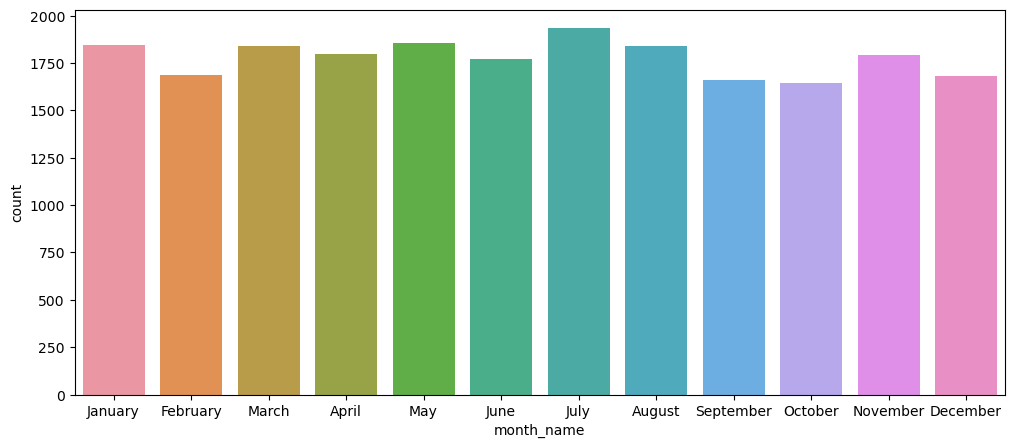

In [42]:
plt.figure(figsize=(12, 5))
sns.countplot(data=orders, x='month_name');

#### Seasons:

In [43]:
def month_to_season():
    return (
                orders['month_name']
                .replace(['March', 'April', 'May'], 'Spring')
                .replace(['June', 'July', 'August'], 'Summer')
                .replace(['September', 'October', 'November'], 'Autumn')
                .replace(['December', 'January', 'February'], 'Winter')
            )

In [44]:
# create new column
orders['season'] = month_to_season()

In [45]:
orders['season'].value_counts()

Summer    5549
Spring    5492
Winter    5210
Autumn    5099
Name: season, dtype: int64

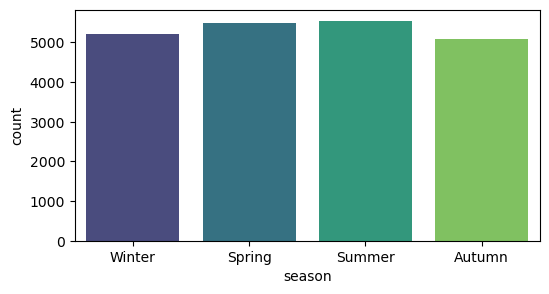

In [46]:
plt.figure(figsize=(6, 3))
sns.countplot(data=orders, x='season', palette='viridis');

#### Days of Week:

In [47]:
days_of_week = orders['day_name'].value_counts()[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
days_of_week

Monday       2794
Tuesday      2973
Wednesday    3024
Thursday     3239
Friday       3538
Saturday     3158
Sunday       2624
Name: day_name, dtype: int64

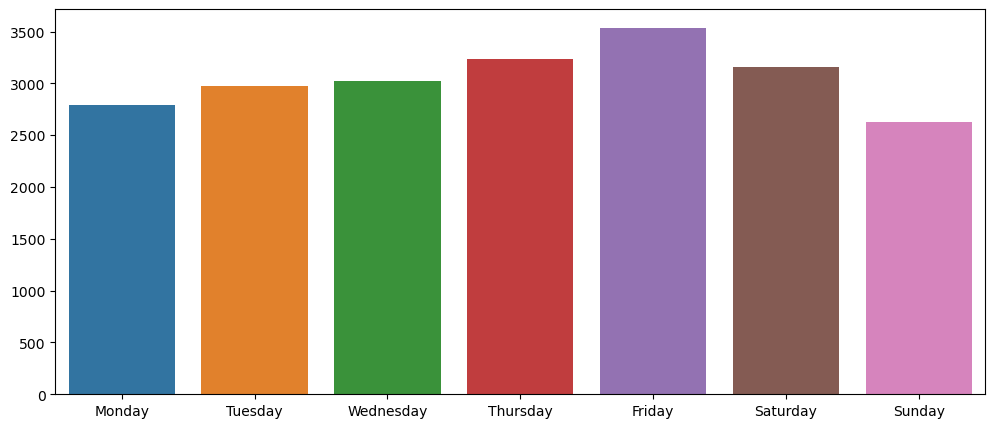

In [48]:
plt.figure(figsize=(12, 5))
sns.barplot(x=days_of_week.index, y=days_of_week.values);

#### Days of Months:

In [49]:
days = orders.day.value_counts().sort_index()
days

1     820
2     712
3     721
4     747
5     625
6     727
7     710
8     719
9     703
10    728
11    731
12    634
13    718
14    715
15    809
16    713
17    717
18    699
19    634
20    728
21    687
22    664
23    716
24    669
25    557
26    666
27    786
28    648
29    587
30    627
31    433
Name: day, dtype: int64

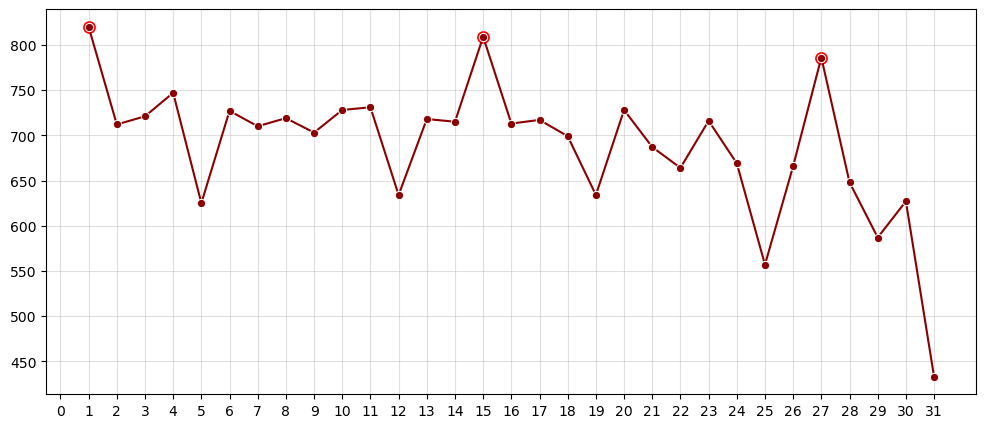

In [50]:
plt.figure(figsize=(12, 5))
sns.lineplot(x=days.index, y=days.values, color='darkred', marker='o')
sns.scatterplot(x=[1, 15, 27], y=[820, 809, 786], s=100, color='r', marker='o')
plt.xticks(range(0, 32))
plt.grid(alpha=0.4);

#### Hour:

In [51]:
hours = orders['hour'].value_counts().sort_index()
hours

9        1
10       8
11    1231
12    2520
13    2455
14    1472
15    1468
16    1920
17    2336
18    2399
19    2009
20    1642
21    1198
22     663
23      28
Name: hour, dtype: int64

In [52]:
np.arange(11)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

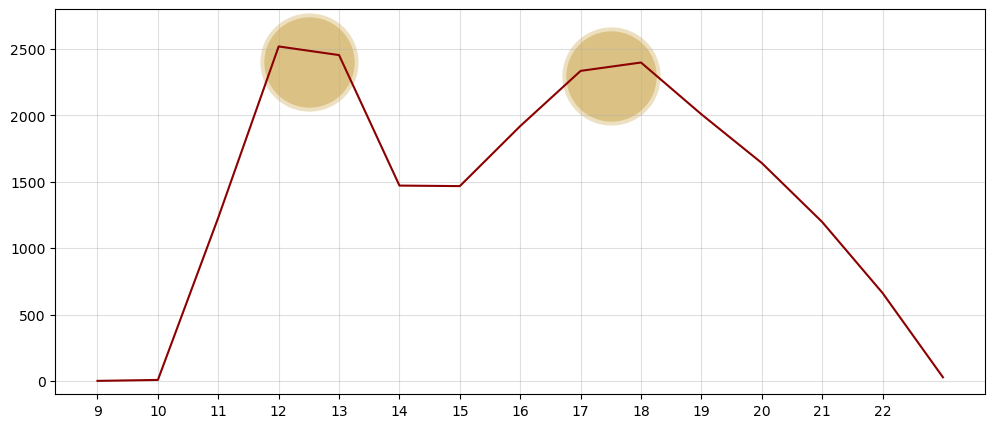

In [53]:
plt.figure(figsize=(12, 5))
sns.lineplot(x=hours.index, y=hours.values, color='darkred')
sns.scatterplot(x=[12.5, 17.5], y=[2400, 2300], s=5000, alpha=0.5, color='darkgoldenrod')
plt.xticks(range(9, 23))
plt.ylim((-100, 2800))
plt.grid(alpha=0.4);

# **3. Introduction the data set 'pizza_types'**

In [54]:
pizza_types

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."
5,thai_ckn,The Thai Chicken Pizza,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha..."
6,big_meat,The Big Meat Pizza,Classic,"Bacon, Pepperoni, Italian Sausage, Chorizo Sau..."
7,classic_dlx,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
8,hawaiian,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
9,ital_cpcllo,The Italian Capocollo Pizza,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,..."


In [55]:
count_pizza = len(pizza_types)
print('We have {} types of pizza.'.format(count_pizza))

We have 32 types of pizza.


In [56]:
print('We have 4 categories of pizza:\n')
print(pd.Series(pizza_types.category.value_counts().index, index=range(1, 5)))

We have 4 categories of pizza:

1    Supreme
2     Veggie
3    Classic
4    Chicken
dtype: object


## **4. Create Columns from Other Tables**

In [66]:
# create 'category' column at 'pizzas' table from 'pizza_types' table
type_list = pizzas['pizza_type_id'].values
def func_pizzas():
    return (
                pizzas
                .assign(category=[pizza_types.loc[pizza_types['pizza_type_id'] == i, 'category'].values[0] for i in type_list])
            )

pizzas = func_pizzas()

In [103]:
# create 'category', 'unit_price', 'size', and 'total_price' columns at 'order_details' table from 'pizzas' table
type_list = order_details['pizza_id'].values
def func_pizzas():
    return (
                order_details
                .assign(category=[pizzas.loc[pizzas['pizza_id'] == i, 'category'].values[0] for i in type_list],
                        unit_price=[pizzas.loc[pizzas['pizza_id'] == i, 'price'].values[0] for i in type_list],
                        size=[pizzas.loc[pizzas['pizza_id'] == i, 'size'].values[0] for i in type_list])
            )
def total_price():
    X = func_pizzas()
    return (
                X
                .assign(total_price=X.unit_price * X.quantity)
            )

order_details = total_price()

In [219]:
# create 'total_price' coloumn at 'orders' table from 'order_details' table
orders['total_price'] = order_details.groupby('order_id')['total_price'].sum().values

# create 'quantity' coloumn at 'orders' table from 'order_details' table
orders['quantity'] = order_details.groupby('order_id')['quantity'].sum().values

In [194]:
# create 'pizza' columns without size information
order_details['pizza'] = [pizzas.loc[pizzas['pizza_id'] == i, 'pizza_type_id'].values[0] for i in order_details['pizza_id'].values]

In [220]:
orders.head(2)

,order_id,date,time,year,month,day,month_name,day_name,hour,season,total_price,quantity
0,1,2015-01-01,11:38:36,2015,1,1,January,Thursday,11,Winter,13.25,1
1,2,2015-01-01,11:57:40,2015,1,1,January,Thursday,11,Winter,92.00,5


In [218]:
order_details.head(2)

,order_details_id,order_id,pizza_id,quantity,category,unit_price,total_price,size,pizza
0,1,1,hawaiian_m,1,Classic,13.25,13.25,M,hawaiian
1,2,2,classic_dlx_m,1,Classic,16.00,16.00,M,classic_dlx


## **5. Results**

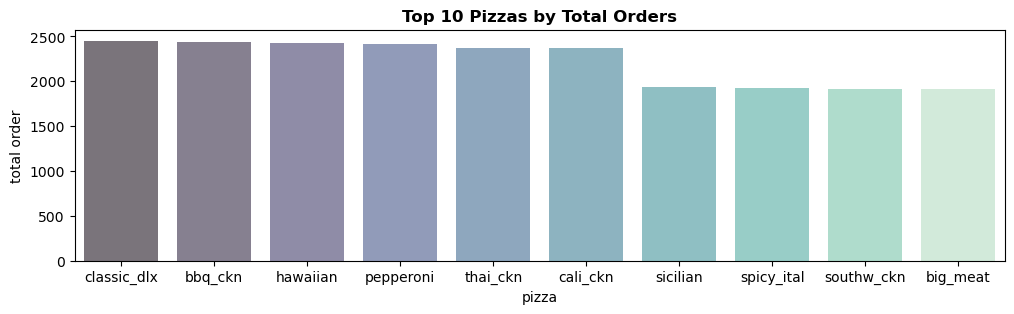

In [238]:
# top 10 pizzas by total orders
top_pizza_orders = order_details.groupby('pizza')['quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 3))
sns.barplot(x=top_pizza_orders.index, y=top_pizza_orders.values, palette='mako', alpha=0.6)
plt.title('Top 10 Pizzas by Total Orders', weight='bold')
plt.ylabel('total order');

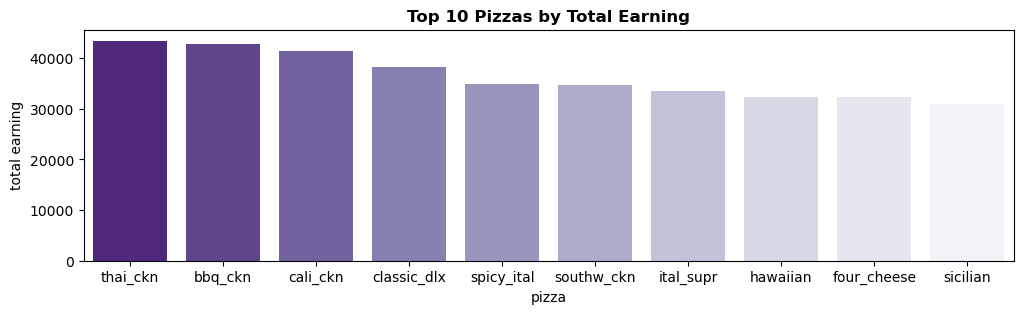

In [246]:
# Top 10 pizzas by total earning
top_pizza_price = order_details.groupby('pizza')['total_price'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 3))
sns.barplot(x=top_pizza_price.index, y=top_pizza_price.values, palette='Purples_r', alpha=1)
plt.title('Top 10 Pizzas by Total Earning', weight='bold')
plt.ylabel('total earning');

In [247]:
# Total orders by category
category_orders = order_details.groupby('category')['quantity'].sum().sort_values(ascending=False).head(10)
category_orders

category
Classic    14888
Supreme    11987
Veggie     11649
Chicken    11050
Name: quantity, dtype: int64

In [248]:
# Total earnings by category
category_price = order_details.groupby('category')['total_price'].sum().sort_values(ascending=False).head(10)
category_price

category
Classic    220053.10
Supreme    208197.00
Chicken    195919.50
Veggie     193690.45
Name: total_price, dtype: float64

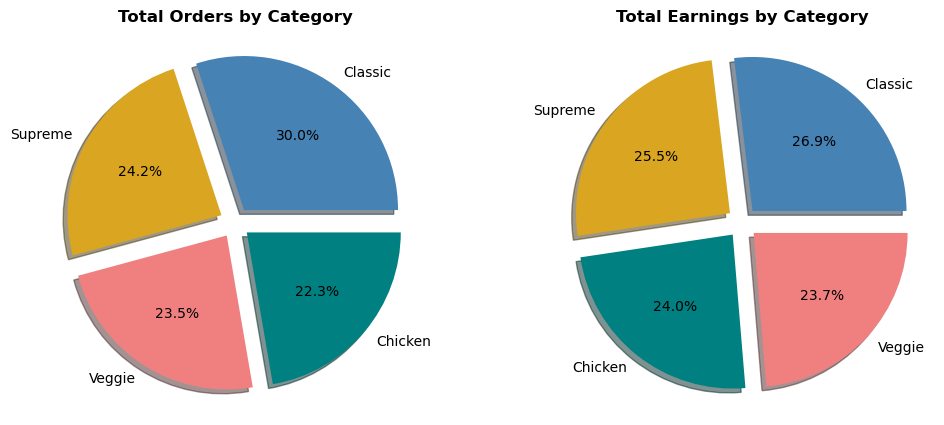

In [285]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].pie(x=category_orders.values, labels=category_orders.index, autopct="%.1f%%",
        colors=('steelblue', 'goldenrod', 'lightcoral', 'teal'), shadow=True,
        explode=(0.1, 0.1, 0.1, 0.1))
ax[1].pie(x=category_price.values, labels=category_price.index, autopct="%.1f%%",
        colors=('steelblue', 'goldenrod', 'teal', 'lightcoral'), shadow=True,
        explode=(0.1, 0.1, 0.1, 0.1))

ax[0].set_title('Total Orders by Category', weight='bold')
ax[1].set_title('Total Earnings by Category', weight='bold')

plt.show()

In [295]:
# Months by orders
month_orders = orders.groupby('month')['quantity'].sum()
month_orders

month
1     4232
2     3961
3     4261
4     4151
5     4328
6     4107
7     4392
8     4168
9     3890
10    3883
11    4266
12    3935
Name: quantity, dtype: int64

In [296]:
# Months by total earnings
month_earnings = orders.groupby('month')['total_price'].sum()
month_earnings

month
1     69793.30
2     65159.60
3     70397.10
4     68736.80
5     71402.75
6     68230.20
7     72557.90
8     68278.25
9     64180.05
10    64027.60
11    70395.35
12    64701.15
Name: total_price, dtype: float64

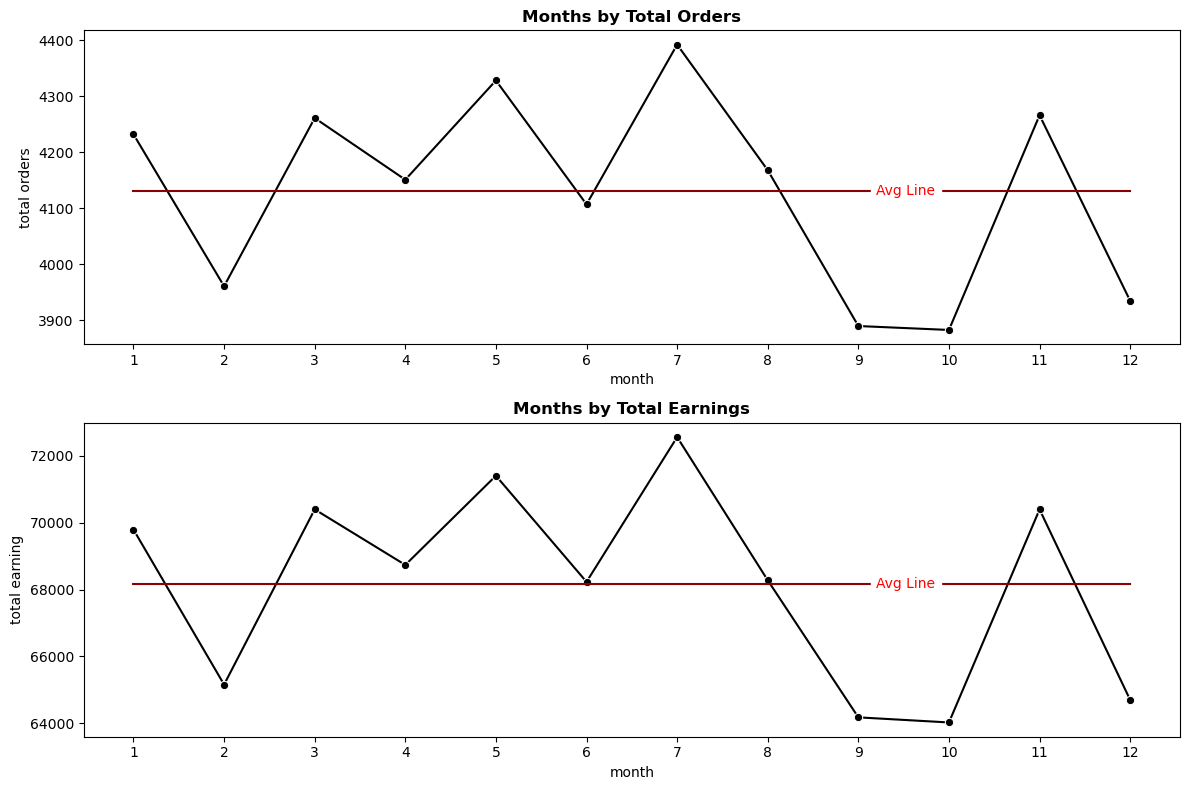

In [381]:
avg_month_orders = month_orders.values.mean()
avg_month_earnings = month_earnings.values.mean()

fig, ax = plt.subplots(2, 1, figsize=(12, 8))

sns.lineplot(x=month_orders.index, y=month_orders.values, ax=ax[0], marker='o', color='black')
sns.lineplot(x=month_orders.index, y=[avg_month_orders] * len(month_orders), ax=ax[0], color='darkred')
sns.lineplot(x=month_earnings.index, y=month_earnings.values, ax=ax[1], marker='o', color='black')
sns.lineplot(x=month_orders.index, y=[avg_month_earnings] * len(month_earnings), ax=ax[1], color='darkred')

ax[0].set_xticks(range(1, 13))
ax[0].set_title('Months by Total Orders', weight='bold')
ax[0].set_ylabel('total orders')
ax[1].set_xticks(range(1, 13))
ax[1].set_title('Months by Total Earnings', weight='bold')
ax[1].set_ylabel('total earning')

ax[0].text(x=9.2, y=avg_month_orders, s='Avg Line', color='red', va='center', ha='left', backgroundcolor='white')
ax[1].text(x=9.2, y=avg_month_earnings, s='Avg Line', color='red', va='center', ha='left', backgroundcolor='white')

plt.tight_layout()
plt.show()